In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False
#sns.set(font='SimHei',font_scale=1.5)

In [2]:
data=pd.read_excel('最后筛选出九个变量.xlsx',index_col=0)
y=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/RON损失(不是变量).xlsx')[::-1].reset_index(drop=True)
y=y.iloc[:,2]
# data=data.iloc[:,2:]
y.head()

0    1.25
1    1.28
2    1.35
3    1.25
4    1.15
Name: RON损失\n（不是变量）, dtype: float64

In [4]:
#数据统计描述
data.describe()

,原料换热器管程总管进口温度,1.0MPa蒸汽进装置温度,氮气进装置流量,稳定塔顶压力,K101机出口压力,蒸汽进装置流量,加氢裂化轻石脑油进装置流量,辛烷值,硫含量
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,61.720083,199.269782,587.239196,0.656053,3.125093,1095.911919,4843.993930,89.701538,4.058154
std,6.022425,11.566468,59.734217,0.004708,0.063555,619.605797,2359.134691,0.950064,1.551175
min,45.755621,178.126682,294.996320,0.639048,2.997825,0.000000,0.000000,85.300000,3.200000
25%,57.407770,191.865380,547.941552,0.650054,3.079970,651.270477,4215.424100,89.200000,3.200000
50%,61.692005,197.816320,581.589035,0.659935,3.121913,1021.293608,5094.966775,89.800000,3.200000
75%,66.592527,205.580960,631.289040,0.660025,3.199213,1489.937150,6129.741900,90.300000,4.400000
max,73.767719,249.179738,778.451208,0.660204,3.222043,3068.707850,11320.456750,91.700000,11.800000


In [5]:
describe=pd.concat([data.describe(),pd.DataFrame(data.skew()).T,pd.DataFrame(data.kurt()).T],axis=0)

In [6]:
index=list(data.describe().index)+['skew','kurt']
describe.index=index

In [7]:
#describe.to_excel('描述性统计.xlsx')

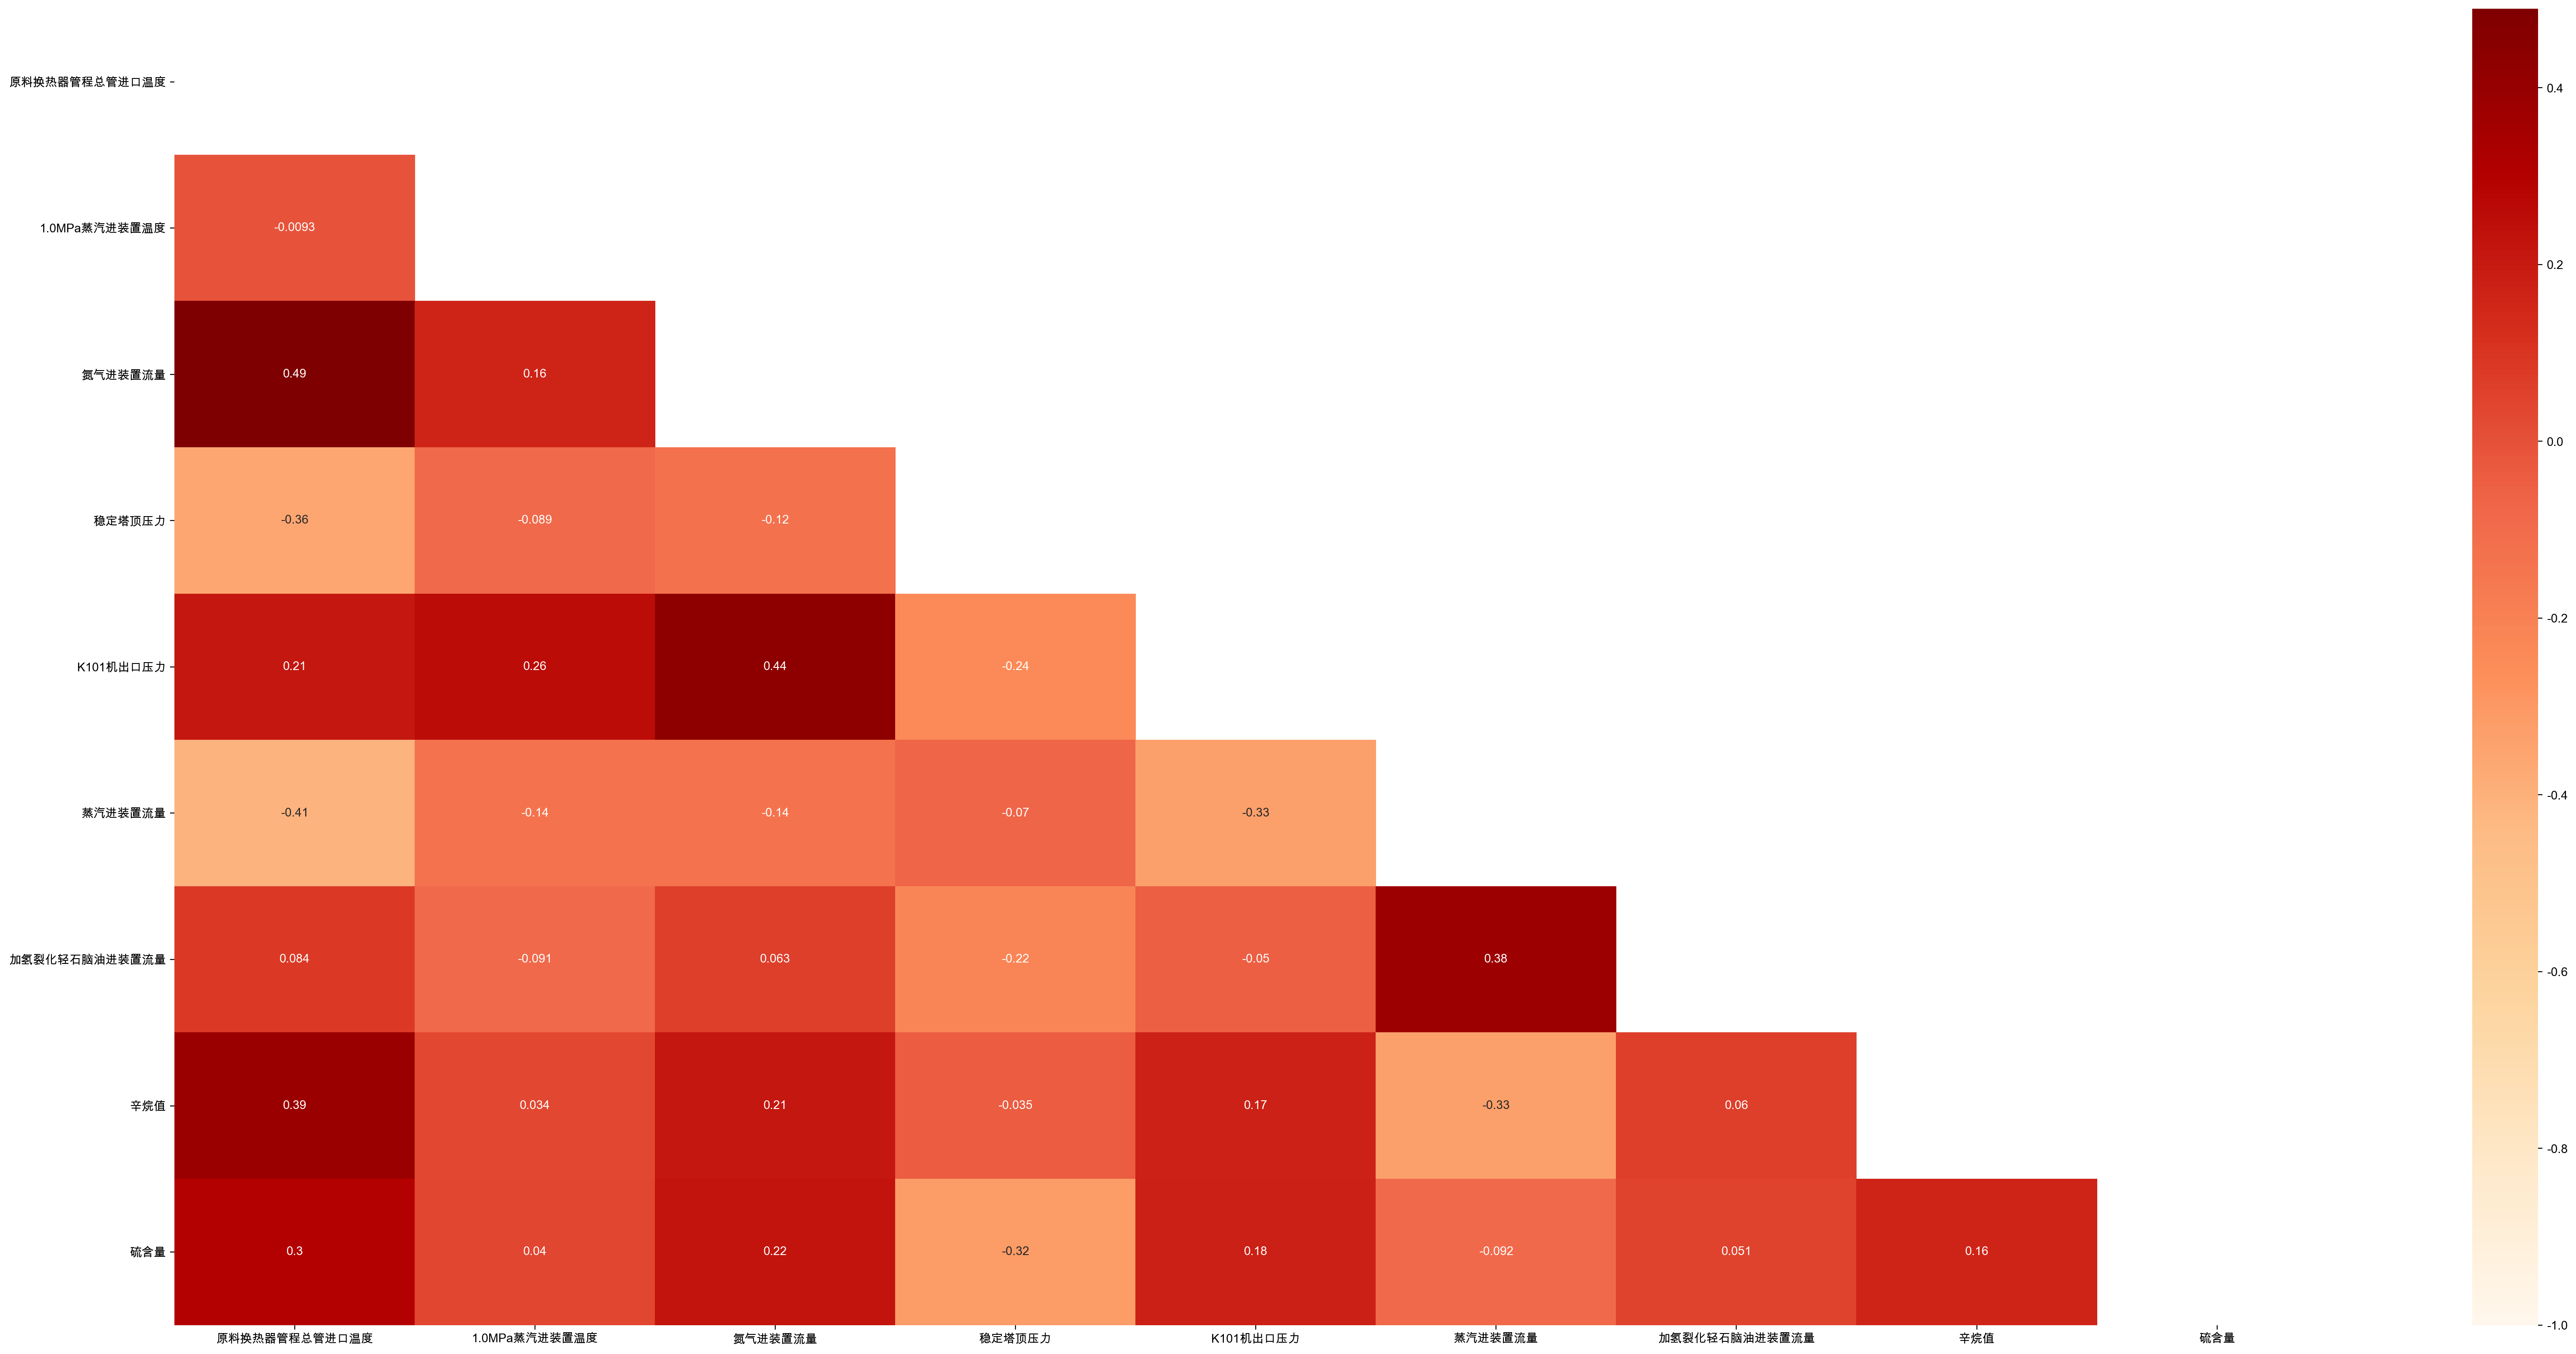

In [8]:
#画热力图
plt.figure(figsize=(40,20),dpi=200)
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data.corr(),annot=True,vmin=-1,mask=mask,cmap='OrRd',fmt='.2')
plt.savefig('热力图.png') #保存到本地

In [10]:
# #y和各变量之间的散点图
# for  i in data.columns:
#     plt.figure(figsize=(10,6),dpi=200)
#     plt.scatter(data.iloc[:,0],y)
#     plt.xlabel(i)
#     plt.ylabel('RON损失')
#     name=i+'和RON损失的散点图.png'
#     plt.savefig(name)

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [12]:
#划分训练集和测试集
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.3,random_state=0)

In [13]:
#线性核
svr1=SVR(kernel='linear').fit(xtrain,ytrain)
mean_absolute_error(ytest,svr1.predict(xtest))#测试集误差

1.8371500864969754

In [14]:
#训练集误差
mean_absolute_error(ytrain,svr1.predict(xtrain))

1.8744619472832356

In [13]:
# #poly 网格搜索
# param1={'kernel':['poly']
#     ,'degree':np.linspace(1,5,4)
#     ,'coef0':np.linspace(0,5,5)
#     #,'gamma':np.linspace(0.1,1,2)
#        }
# grid_search1=GridSearchCV(SVR(cache_size=800)
#                           ,param_grid=param1
#                           ,cv=3
#                          ,scoring='neg_mean_absolute_error').fit(xtrain,ytrain)

In [14]:
# #最佳参数
# grid_search1.best_params_,grid_search1.best_score_

({'coef0': 5.0, 'degree': 3.6666666666666665, 'kernel': 'poly'},
 -0.1500025956819301)

In [15]:
#测试集误差
mean_absolute_error(ytest,
                    SVR(kernel='poly',coef0=5,degree=3,cache_size=800).fit(xtrain,ytrain).predict(xtest))

0.1701593555538032

In [31]:
# #rbf核
# param2={'kernel':['rbf']
#         ,'gamma':np.linspace(4.5,5,100)
#         #,'C':np.linspace(0.00001,0.001,100)
#        }
# grid_search2=GridSearchCV(SVR(cache_size=800)
#                           ,param_grid=param2
#                           ,cv=3
#                          ,scoring='neg_mean_absolute_error').fit(xtrain,ytrain)

In [32]:
#grid_search2.best_params_,grid_search2.best_score_

({'gamma': 4.5, 'kernel': 'rbf'}, -0.16369263970712788)

In [16]:
#测试集误差
mean_absolute_error(ytest,
                    SVR(kernel='rbf',gamma=4.5,cache_size=800).fit(xtrain,ytrain).predict(xtest))

0.17494053736602688

In [45]:
# #sigmoid核
# param3={'kernel':['sigmoid']
#         ,'gamma':np.linspace(1,2.01,10)
#         ,'coef0':np.linspace(-1,1,10)
#         #,'C':np.linspace(0.00001,0.001,100)
#        }
# grid_search3=GridSearchCV(SVR(cache_size=800)
#                           ,param_grid=param3
#                           ,cv=3
#                          ,scoring='neg_mean_absolute_error').fit(xtrain,ytrain)

In [46]:
# grid_search3.best_params_,grid_search3.best_score_

({'coef0': -1.0, 'gamma': 1.0, 'kernel': 'sigmoid'}, -0.16031228070175427)

In [17]:
#测试集误差
mean_absolute_error(ytest,
                    SVR(kernel='sigmoid',gamma=1,coef0=-1,cache_size=800).fit(xtrain,ytrain).predict(xtest))

0.17448979591836802

In [21]:
svr=SVR(kernel='poly',coef0=5,degree=3,cache_size=800).fit(data,y)

In [33]:
data['预测值']=pd.DataFrame(svr.predict(data))

In [38]:
data.insert(9,'实际值',y)

In [40]:
data.to_excel('支持向量回归预测的数值.xlsx',index=None)